#  Прогнозирование заказов такси

## Описание исследования

Компании, предоставляющей услуги такси, необходимо привлекать больше водителей в период пиковой нагрузки в аэропортах. Для этого компании нужно иметь возможность прогнозировать количество заказов такси на следующий час на основе исторических данных. Необходимо построить модель для такого предсказания, при этом значение метрики RMSE на тестовой выборке не должно превышать 48. Таким образом, в исследовании выполняется обучение с учителем для задачи регрессии.

## Цель исследования

Целью исследования является построение модели для предсказания количества заказов такси на следующий час со значением метрики RMSE на тестовой выборке не более 48.

## Задачи исследования

- Загрузка и первичное знакомство с данными;
- Ресемплирование данных с шагом в 1 (один) час;
- Анализ данных о заказах такси, включая проверку процесса на стационарность и тренды;
- Обучение с учителем следующих моделей:
 - `LightGBM`;
 - `Lasso`;
 - `Ridge`;
 - `SVR`;
 - `kNN`;
 - `DecisionTreeRegressor`;
- Проверка моделей на тестовой выборке и выбор лучшей модели.

## Исходные данные

Входной признак:

`datetime` — дата и время заказа такси.


Целевой признак:

`num_orders` — количество заказов такси.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#Задачи-исследования" data-toc-modified-id="Задачи-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задачи исследования</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Импорт-библиотек-и-подготовка-данных" data-toc-modified-id="Импорт-библиотек-и-подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Импорт библиотек и подготовка данных</a></span></li><li><span><a href="#Анализ-данных-о-заказах-такси" data-toc-modified-id="Анализ-данных-о-заказах-такси-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ данных о заказах такси</a></span></li><li><span><a href="#Обучение-с-учителем.-Задача-регрессии" data-toc-modified-id="Обучение-с-учителем.-Задача-регрессии-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение с учителем. Задача регрессии</a></span><ul class="toc-item"><li><span><a href="#Добавление-новых-признаков" data-toc-modified-id="Добавление-новых-признаков-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Добавление новых признаков</a></span></li><li><span><a href="#Обучение-модели-LightGBM" data-toc-modified-id="Обучение-модели-LightGBM-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Обучение модели LightGBM</a></span></li><li><span><a href="#Обучение-модели-Lasso" data-toc-modified-id="Обучение-модели-Lasso-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Обучение модели Lasso</a></span></li><li><span><a href="#Обучение-модели-Ridge" data-toc-modified-id="Обучение-модели-Ridge-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Обучение модели Ridge</a></span></li><li><span><a href="#Обучение-модели-SVR" data-toc-modified-id="Обучение-модели-SVR-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Обучение модели SVR</a></span></li><li><span><a href="#Обучение-модели-kNN" data-toc-modified-id="Обучение-модели-kNN-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Обучение модели kNN</a></span></li><li><span><a href="#Обучение-модели-дерева-решений" data-toc-modified-id="Обучение-модели-дерева-решений-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Обучение модели дерева решений</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Тестирование-лучшей-модели-на-тестовой-выборке-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Импорт библиотек и подготовка данных

In [1]:
# обновляем библиотеку sklearn
!pip install --upgrade scikit-learn -q

In [2]:
# обновляем библиотеку matplotlib
!pip install --upgrade matplotlib -q

In [3]:
# обновляем библиотеку seaborn
!pip install --upgrade seaborn -q

In [4]:
# обновляем библиотеку lightgbm
!pip install --upgrade lightgbm -q

In [5]:
# обновляем библиотеку optuna
!pip install --upgrade optuna-integration -q

In [6]:
# обновляем библиотеку statsmodels
!pip install --upgrade statsmodels -q

In [7]:
# делаем необходимые импорты
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from lightgbm import LGBMRegressor

from optuna.distributions import IntDistribution, FloatDistribution
from optuna.integration import OptunaSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [8]:
# объявляем константы
RANDOM_STATE = 2024
TEST_SIZE = 0.1

In [9]:
# загружаем данные
try:
    df_taxi = pd.read_csv(
        'taxi.csv',
        parse_dates = [0],
        index_col = [0]
    )
except:
    df_taxi = pd.read_csv(
        'https://code.s3.yandex.net/datasets/taxi.csv',
        parse_dates = [0],
        index_col = [0]
    )

In [10]:
# выводим первые пять строк датафрейма
df_taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [11]:
# отсортируем индексы датафрейма в порядке возрастания
df_taxi.sort_index(inplace=True)

# проверим, верно ли отсортировались индексы
df_taxi.index.is_monotonic_increasing

True

In [12]:
# выведем общую информацию о датафрейме
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [13]:
# ресемплируем данные по одному часу
df_taxi = df_taxi.resample('1h').sum()

In [14]:
# проверяем, как прошло ресемплирование
df_taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


**Вывод**

На данном этапе мы загрузили, выполнили первичное знакомство и подготовку данных.

Датасет содержит наблюдения в период с 01 марта 2018 года по 31 августа 2018 года (6 месяцев), причём каждое наблюдение содержит данные о суммарном количестве заказов с интервалом в 10 минут.

Для дальнейшего анализа и обучения моделей мы выполнили ресемплирование данных с шагом в 1 (один) час.

## Анализ данных о заказах такси

In [15]:
# смотрим описательную статистику
df_taxi.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


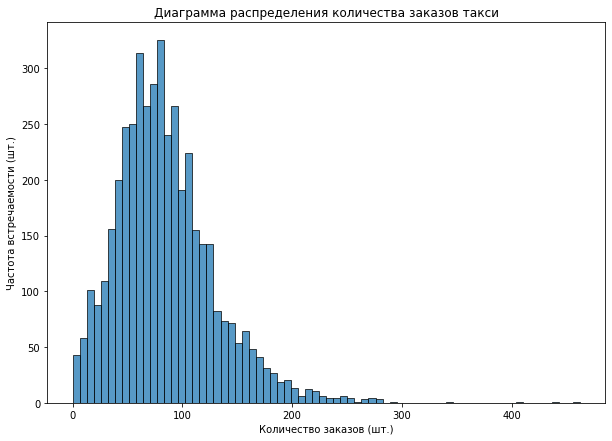

In [16]:
# строим гистограмму распределения заказов
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(df_taxi, x='num_orders')
plt.title('Диаграмма распределения количества заказов такси')
plt.xlabel('Количество заказов (шт.)')
plt.ylabel('Частота встречаемости (шт.)');

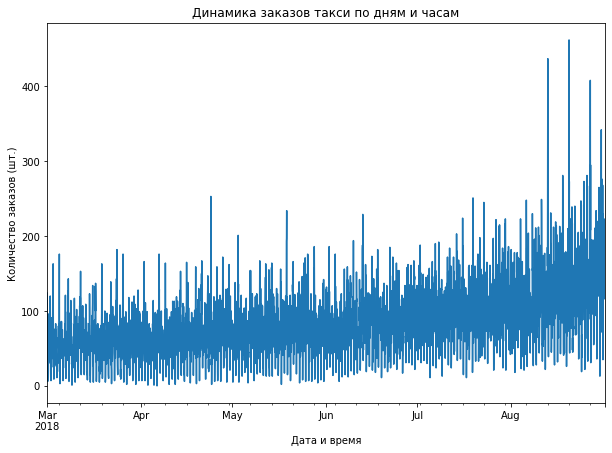

In [17]:
# строим график заказов по дням и часам
df_taxi.plot(legend=False, figsize=(10, 7))
plt.title('Динамика заказов такси по дням и часам')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)');

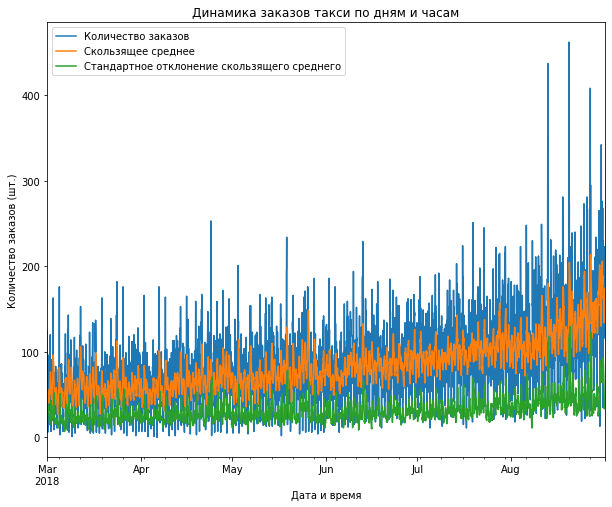

In [18]:
# добавляем скользящее среднее и стандартное отклонение среднего
df_taxi['rolling_mean'] = df_taxi.num_orders.rolling(10).mean()
df_taxi['rolling_std'] = df_taxi.num_orders.rolling(10).std()

# строим график со скользящим средним
df_taxi.plot(figsize=(10, 8))
plt.title('Динамика заказов такси по дням и часам')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)')
plt.legend(['Количество заказов',
            'Скользящее среднее',
            'Стандартное отклонение скользящего среднего']);

In [19]:
# удаляем ранее добавленные временные признаки
df_taxi.drop(['rolling_mean', 'rolling_std'], axis=1, inplace=True)

In [20]:
# проверяем процесс на стационарность
adf_test = adfuller(df_taxi.num_orders)

# выводим p-value
print('Значение p-value:', adf_test[1])
if adf_test[1] > 0.05:
    print('Не получилось отвергнуть нулевую гипотезу. Процесс нестационарный.')
else:
    print('Отвергаем нулевую гипотезу. Процесс стационарный.')

Значение p-value: 0.028940051402612906
Отвергаем нулевую гипотезу. Процесс стационарный.


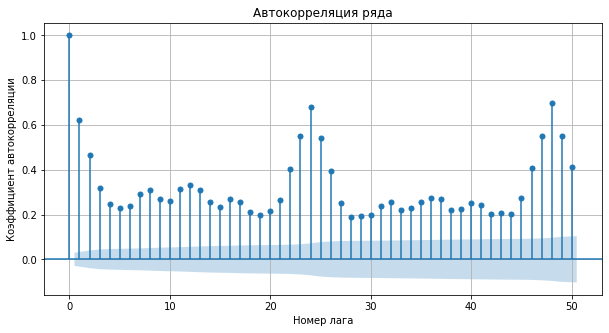

In [21]:
# строим диаграмму автокорреляции ряда
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df_taxi.num_orders,
         lags=np.arange(0, 51),
         ax=ax,
         title='Автокорреляция ряда')
plt.grid(True)
plt.xlabel('Номер лага')
plt.ylabel('Коэффициент автокорреляции')
plt.axis('tight');

Изучим тренды по времени суток, календарным дням, дням недели и месяцам. Для этого добавим в датафрейм новые признаки и построим графики.

In [22]:
# добавляем новые признаки
df_taxi['hour'] = df_taxi.index.hour
df_taxi['day'] = df_taxi.index.day
df_taxi['dayofweek'] = df_taxi.index.dayofweek
df_taxi['month'] = df_taxi.index.month

Посмотрим на тренд, сезонность и остатки всего временного ряда:

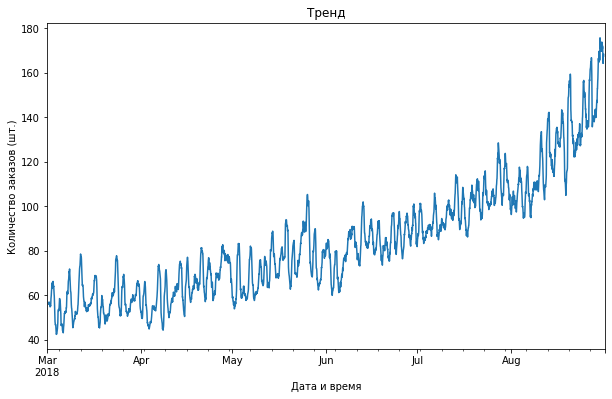

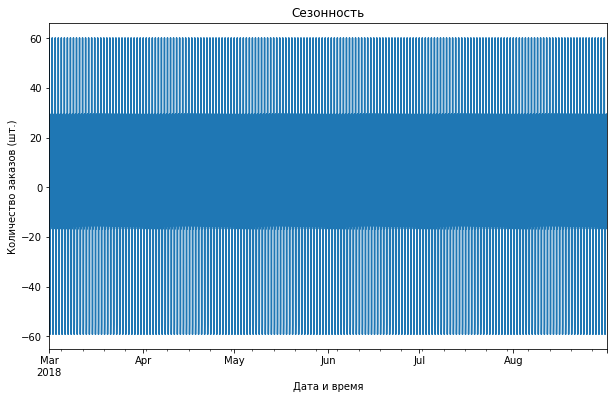

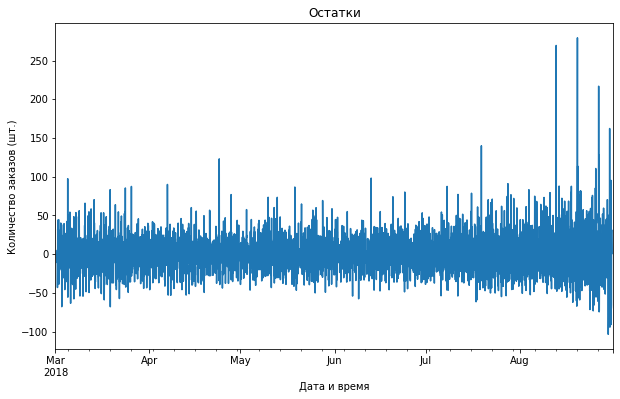

In [24]:
# разложим ряд на тренд, сезонность и остатки
decomposed = seasonal_decompose(df_taxi.num_orders)

# визуализируем тренд
fig, ax = plt.subplots(figsize=(10, 6))
decomposed.trend.plot()
plt.title('Тренд')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)')

# визуализируем сезонность
fig, ax = plt.subplots(figsize=(10, 6))
decomposed.seasonal.plot()
plt.title('Сезонность')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)')

# визуализируем остатки
fig, ax = plt.subplots(figsize=(10, 6))
decomposed.resid.plot()
plt.title('Остатки')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)');

Изучим сезонность, например, на недельном временном отрезке с 25 августа 2018 года по 31 августа 2018 года:

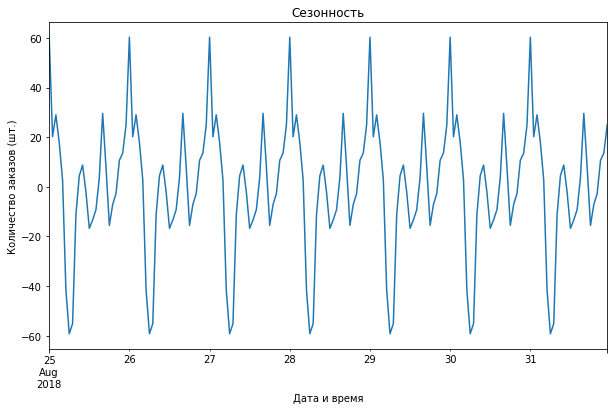

In [25]:
# визуализируем сезонность на выбранном временном отрезке
fig, ax = plt.subplots(figsize=(10, 6))
(seasonal_decompose(df_taxi.num_orders)
 .seasonal['2018-08-25':'2018-08-31'].plot())
plt.title('Сезонность')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)');

**Вывод**

Мы видим, что данные высоко вариативны (стандартное отклонение 45 при среднем 84), при этом распределение числа заказов демонстрирует небольшую правую скошенность.

Динамика количества заказов такси по дням и часам демонстрирует заметный тренд: количество заказов в летний период возрастает. Тем не менее, имеющийся временной ряд можно считать вполне стационарным ввиду незначительного увеличения скользящего среднего ближе к концу ряда и практически постоянного стандартного отклонения скользящего среднего на всём временном промежутке. Стационарность процесса также подтверждается тестом Дики-Фуллера. Таким образом, имеющийся временной ряд можно прогнозировать.

По результатам анализа автокорреляции ряда видно, что сильнее всего с исходным рядом коррелирует 24-й лаг (то есть значения, отстоящие на сутки), что говорит о временной "сезонности" спроса на такси: в одни и те же часы суток поведение клиентов примерно одинаково. При этом коэффициенты корреляции всех рассмотренных лагов статистически значимы. На основании анализа графика автокорреляции для обучения моделей уместно использовать 1-й, 2-й, 3-й и 24-й лаги: лаги 1-3 непосредственно предшествуют текущему часу, а 24-й лаг даёт представление о тренде в аналогичном часе сутками ранее.

Заказы по времени суток показали разнонаправленную динамику в зависимости от времени: ранним утром (около 5-6 часов утра) спрос на такси минимален, а в вечерние и ночные часы максимален. Похожую динамику демонстрируют заказы по дням недели: в пятницу и понедельник количество заказов максимально, в пятницу и понедельник количество заказов максимально, а во вторник, субботу и воскресенье наблюдается спад (вероятно, это связано с цикличными перемещениями клиентов к местам отдыха и обратно).

Динамика заказов по календарным дням и месяцам демонстрирует восходящий тренд.

Всё вышеизложенное позволяет утверждать, что время суток, календарный день, день недели и месяц являются признаками, имеющими значимую дифференцирующую силу для предсказаний, поэтому их следует использовать для обучения моделей.

## Обучение с учителем. Задача регрессии

В данном разделе мы выполним обучение с учителем для задачи линейной регрессии (прогнозирования временного ряда) следующих моделей:

- `LightGBM`;
- `Lasso`;
- `Ridge`;
- `SVR`;
- `kNN`;
- `DecisionTreeRegressor`.

Мы добавим в датафрейм новые признаки (лаги).
Для каждой из моделей мы подберём гиперпараметры, проверим качество моделей при кросс-валидации и затем обучим модели.

Критерием удовлетворительного качества модели является значение метрики RMSE не более 48.

### Добавление новых признаков

In [26]:
# создаём функцию для добавления новых признаков
def make_features(data,
                  column,
                  *max_lag,
                  new_cols=None,
                  rolling_mean_size=10):
    df_copy = data.copy()
    
    if new_cols:
        df_copy['year'] = df_copy.index.year
        df_copy['month'] = df_copy.index.month
        df_copy['day'] = df_copy.index.day
        df_copy['dayofweek'] = df_copy.index.dayofweek
    
    for lag in max_lag:
        df_copy['lag_{}'.format(lag)] = df_copy[column].shift(lag)

    df_copy['rolling_mean'] = (df_copy[column]
                               .shift()
                               .rolling(rolling_mean_size)
                               .mean())
    
    return df_copy

In [27]:
# добавляем новые признаки
df_new = make_features(df_taxi, 'num_orders', 1, 2, 3, 24)

# удаляем строки с пропусками
df_new.dropna(inplace=True)

df_new.head()

,num_orders,hour,day,dayofweek,month,lag_1,lag_2,lag_3,lag_24,rolling_mean
datetime,,,,,,,,,,
2018-03-02 00:00:00,90,0,2,4,3,58.0,113.0,66.0,124.0,61.7
2018-03-02 01:00:00,120,1,2,4,3,90.0,58.0,113.0,85.0,65.9
2018-03-02 02:00:00,75,2,2,4,3,120.0,90.0,58.0,71.0,71.3
2018-03-02 03:00:00,64,3,2,4,3,75.0,120.0,90.0,66.0,74.5
2018-03-02 04:00:00,20,4,2,4,3,64.0,75.0,120.0,43.0,76.5


In [28]:
# разделяем данные на тренировочную и тестовую выборки
train, test = train_test_split(df_new,
                               shuffle=False,
                               test_size=TEST_SIZE)

# проверяем, как прошло разделение
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-02 00:00:00 2018-08-13 15:00:00
2018-08-13 16:00:00 2018-08-31 23:00:00


In [29]:
# разделяем признаки на входные и целевые
X_train = train.drop('num_orders', axis=1)
X_test = test.drop('num_orders', axis=1)
y_train = train['num_orders']
y_test = test['num_orders']

# проверяем, как прошло разделение
X_train.shape, X_test.shape

((3952, 9), (440, 9))

In [30]:
# объявляем функцию для поискаи гиперпараметров
def search_best_params(hyper_param_search_method,
                       model,
                       param_grid,
                       cv=5,
                       scoring='neg_root_mean_squared_error',
                       random_state=None,
                       n_jobs=1,
                       X_train=None,
                       y_train=None,
                       scoring_name='RMSE'):
    # инициализируем модель для поиска лучших гиперпараметов
    if hyper_param_search_method == OptunaSearchCV:
        gs = hyper_param_search_method(
            model,
            param_grid,
            cv=cv,
            scoring=scoring,
            random_state=random_state,
            n_jobs=n_jobs
        )
    else:
        gs = hyper_param_search_method(
            model,
            param_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=n_jobs
        )

    # запускаем поиск гиперпараметров
    gs.fit(X_train, y_train)

    # получаем лучшую метрику при кросс-валидации
    print(f'Лучший результат метрики {scoring_name} при кросс-валидации:\n',
          gs.best_score_)

    # получаем лучшие гиперпараметры при кросс-валидации
    print(f'Лучшая модель при кросс-валидации:\n',
          gs.best_estimator_)
    
    return gs

In [31]:
# инициализируем объект для разделения временного ряда на фолды
tscv = TimeSeriesSplit(n_splits=10)

### Обучение модели LightGBM

In [32]:
# инициализируем модель для обучения
lgb_model = LGBMRegressor(random_state=RANDOM_STATE,
                          n_jobs=-1,
                          verbosity=-1)

# задаем гиперпараметры для перебора
param_grid = {
    'min_data_in_leaf': IntDistribution(5, 100),
    'max_depth': IntDistribution(4, 20),
    'num_leaves': IntDistribution(10, 100)
}

# выполняем поиск гиперпараметров
gs = search_best_params(OptunaSearchCV,
                        lgb_model,
                        param_grid,
                        cv=tscv,
                        random_state=RANDOM_STATE,
                        X_train=X_train,
                        y_train=y_train)

# обучаем лучшую модель
lgb_best_model = gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_197/3982002133.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-06-20 10:32:40,897] A new study created in memory with name: no-name-9b9fde2b-b89d-4502-a414-9dd25bf50e2f
[I 2024-06-20 10:32:41,446] Trial 0 finished with value: -24.29966759021369 and parameters: {'min_data_in_leaf': 53, 'max_depth': 13, 'num_leaves': 41}. Best is trial 0 with value: -24.29966759021369.
[I 2024-06-20 10:32:41,923] Trial 1 finished with value: -24.35554306847423 and parameters: {'min_data_in_leaf': 72, 'max_depth': 15, 'num_leaves': 55}. Best is trial 0 with value: -24.29966759021369.
[I 2024-06-20 10:32:42,467] Trial 2 finished with value: -24.297769391829345 and parameters: {'min_data_in_leaf': 41, 'max_depth': 9, 'num_leaves': 53}. Best is trial 2 with value: -24.297769391829345.
[I 2024-06-20 10:32:43,071] Trial 3 finished with value: -24.231902863672474 and parameters: 

Лучший результат метрики RMSE при кросс-валидации:
 -24.048063249126567
Лучшая модель при кросс-валидации:
 LGBMRegressor(max_depth=7, min_data_in_leaf=45, n_jobs=-1, num_leaves=15,
              random_state=2024, verbosity=-1)


### Обучение модели Lasso

In [33]:
# инициализируем модель для обучения
lasso_model = Lasso(random_state=RANDOM_STATE)

# задаем гиперпараметры для перебора
param_grid = {
    'alpha': FloatDistribution(0, 10, step=0.01)
}

# выполняем поиск гиперпараметров
gs = search_best_params(OptunaSearchCV,
                        lasso_model,
                        param_grid,
                        cv=tscv,
                        random_state=RANDOM_STATE,
                        X_train=X_train,
                        y_train=y_train)

# обучаем лучшую модель
lasso_best_model = gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_197/3982002133.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-06-20 10:32:45,940] A new study created in memory with name: no-name-024fe521-2bb1-4e2c-b018-937207820e3c
[I 2024-06-20 10:32:46,279] Trial 0 finished with value: -26.976111387531724 and parameters: {'alpha': 5.03}. Best is trial 0 with value: -26.976111387531724.
[I 2024-06-20 10:32:46,678] Trial 1 finished with value: -26.980369316928467 and parameters: {'alpha': 5.65}. Best is trial 0 with value: -26.976111387531724.
[I 2024-06-20 10:32:47,183] Trial 2 finished with value: -26.972363181456796 and parameters: {'alpha': 3.45}. Best is trial 2 with value: -26.972363181456796.
[I 2024-06-20 10:32:47,680] Trial 3 finished with value: -26.991630988891863 and parameters: {'alpha': 7.0}. Best is trial 2 with value: -26.972363181456796.
[I 2024-06-20 10:32:48,182] Trial 4 finished with value: -26.9

Лучший результат метрики RMSE при кросс-валидации:
 -26.97163865883971
Лучшая модель при кросс-валидации:
 Lasso(alpha=3.89, random_state=2024)


### Обучение модели Ridge

In [34]:
# инициализируем модель для обучения
ridge_model = Ridge(random_state=RANDOM_STATE)

# задаем гиперпараметры для перебора
param_grid = {
    'alpha': FloatDistribution(0, 10, step=0.01)
}

# выполняем поиск гиперпараметров
gs = search_best_params(OptunaSearchCV,
                        ridge_model,
                        param_grid,
                        cv=tscv,
                        random_state=RANDOM_STATE,
                        X_train=X_train,
                        y_train=y_train)

# обучаем лучшую модель
ridge_best_model = gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_197/3982002133.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-06-20 10:32:50,876] A new study created in memory with name: no-name-fe6d5790-9646-4f57-9496-52dd64c6e531
[I 2024-06-20 10:32:50,993] Trial 0 finished with value: -26.937096220972773 and parameters: {'alpha': 5.03}. Best is trial 0 with value: -26.937096220972773.
[I 2024-06-20 10:32:51,100] Trial 1 finished with value: -26.93683016781306 and parameters: {'alpha': 5.65}. Best is trial 1 with value: -26.93683016781306.
[I 2024-06-20 10:32:51,281] Trial 2 finished with value: -26.93826575101415 and parameters: {'alpha': 3.45}. Best is trial 1 with value: -26.93683016781306.
[I 2024-06-20 10:32:51,388] Trial 3 finished with value: -26.936430056952513 and parameters: {'alpha': 7.0}. Best is trial 3 with value: -26.936430056952513.
[I 2024-06-20 10:32:51,499] Trial 4 finished with value: -26.93649

Лучший результат метрики RMSE при кросс-валидации:
 -26.936430056952513
Лучшая модель при кросс-валидации:
 Ridge(alpha=7.0, random_state=2024)


### Обучение модели SVR

In [35]:
# инициализируем модель для обучения
svr_model = SVR()

# задаем гиперпараметры для перебора
param_grid = {
    'C': FloatDistribution(0, 10, step=0.01)
}

# выполняем поиск гиперпараметров
gs = search_best_params(OptunaSearchCV,
                        svr_model,
                        param_grid,
                        cv=tscv,
                        random_state=RANDOM_STATE,
                        X_train=X_train,
                        y_train=y_train)

# обучаем лучшую модель
svr_best_model = gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_197/3982002133.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-06-20 10:32:52,186] A new study created in memory with name: no-name-beaed296-7d6f-427b-aed0-3bc44c50f8c6
[I 2024-06-20 10:32:54,455] Trial 0 finished with value: -27.613505316808833 and parameters: {'C': 5.03}. Best is trial 0 with value: -27.613505316808833.
[I 2024-06-20 10:32:56,582] Trial 1 finished with value: -27.515441334642702 and parameters: {'C': 5.65}. Best is trial 1 with value: -27.515441334642702.
[I 2024-06-20 10:32:58,682] Trial 2 finished with value: -28.007294099953697 and parameters: {'C': 3.45}. Best is trial 1 with value: -27.515441334642702.
[I 2024-06-20 10:33:01,420] Trial 3 finished with value: -27.35255685638677 and parameters: {'C': 7.0}. Best is trial 3 with value: -27.35255685638677.
[I 2024-06-20 10:33:03,578] Trial 4 finished with value: -27.379485731796866 and

Лучший результат метрики RMSE при кросс-валидации:
 -27.35255685638677
Лучшая модель при кросс-валидации:
 SVR(C=7.0)


### Обучение модели kNN

In [36]:
# инициализируем модель для обучения
knn_model = KNeighborsRegressor(n_jobs=-1)

# задаем гиперпараметры для перебора
param_grid = {
    'n_neighbors': IntDistribution(3, 100)
}

# выполняем поиск гиперпараметров
gs = search_best_params(OptunaSearchCV,
                        knn_model,
                        param_grid,
                        cv=tscv,
                        random_state=RANDOM_STATE,
                        X_train=X_train,
                        y_train=y_train)

# обучаем лучшую модель
knn_best_model = gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_197/3982002133.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-06-20 10:33:15,773] A new study created in memory with name: no-name-5ace6f03-90cb-4267-a96e-b95ad2ca0c82
[I 2024-06-20 10:33:15,912] Trial 0 finished with value: -27.16932018551819 and parameters: {'n_neighbors': 52}. Best is trial 0 with value: -27.16932018551819.
[I 2024-06-20 10:33:16,051] Trial 1 finished with value: -27.239741966836544 and parameters: {'n_neighbors': 58}. Best is trial 0 with value: -27.16932018551819.
[I 2024-06-20 10:33:16,178] Trial 2 finished with value: -26.917727781050036 and parameters: {'n_neighbors': 36}. Best is trial 2 with value: -26.917727781050036.
[I 2024-06-20 10:33:16,343] Trial 3 finished with value: -27.39916988465031 and parameters: {'n_neighbors': 71}. Best is trial 2 with value: -26.917727781050036.
[I 2024-06-20 10:33:16,495] Trial 4 finished with

Лучший результат метрики RMSE при кросс-валидации:
 -26.917727781050036
Лучшая модель при кросс-валидации:
 KNeighborsRegressor(n_jobs=-1, n_neighbors=36)


### Обучение модели дерева решений

In [37]:
# инициализируем модель для обучения
tree_model = DecisionTreeRegressor(random_state=RANDOM_STATE)

# задаем гиперпараметры для перебора
param_grid = {
    'max_depth': IntDistribution(3, 20),
    'min_samples_split': IntDistribution(3, 100),
    'min_samples_leaf': IntDistribution(5, 50)
}

# выполняем поиск гиперпараметров
gs = search_best_params(OptunaSearchCV,
                        tree_model,
                        param_grid,
                        cv=tscv,
                        random_state=RANDOM_STATE,
                        X_train=X_train,
                        y_train=y_train)

# обучаем лучшую модель
tree_best_model = gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_197/3982002133.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-06-20 10:33:17,186] A new study created in memory with name: no-name-fcc0bd5a-f2a2-48fa-97df-a48707e42f92
[I 2024-06-20 10:33:17,288] Trial 0 finished with value: -27.216113171513296 and parameters: {'max_depth': 12, 'min_samples_split': 58, 'min_samples_leaf': 20}. Best is trial 0 with value: -27.216113171513296.
[I 2024-06-20 10:33:17,387] Trial 1 finished with value: -27.11920375347563 and parameters: {'max_depth': 15, 'min_samples_split': 69, 'min_samples_leaf': 28}. Best is trial 1 with value: -27.11920375347563.
[I 2024-06-20 10:33:17,497] Trial 2 finished with value: -27.081612269272334 and parameters: {'max_depth': 9, 'min_samples_split': 36, 'min_samples_leaf': 26}. Best is trial 2 with value: -27.081612269272334.
[I 2024-06-20 10:33:17,585] Trial 3 finished with value: -27.845609940

Лучший результат метрики RMSE при кросс-валидации:
 -27.081612269272334
Лучшая модель при кросс-валидации:
 DecisionTreeRegressor(max_depth=9, min_samples_leaf=26, min_samples_split=36,
                      random_state=2024)


**Вывод**

В результате обучения все модели показали весьма высокие результаты на кросс-валидации: от 24.0 до 27.4 при требуемом пороге не более 48.0.

Лучшей из моделей по результатам обучения является модель `LGBMRegressor` с гиперпараметрами `max_depth`=7, `min_data_in_leaf`=45, `num_leaves`=15, показавшая значение метрики RMSE при кросс-валидации в размере 24.0.

## Тестирование лучшей модели на тестовой выборке

Выполним предсказания с помощью лучшей модели (`LGBMRegressor`), затем добавим их в выборку `y_test` и построим графики истинных и предсказанных значений.

In [40]:
# выполняем предсказания с помощью лучшей модели
pred = lgb_best_model.predict(X_test)

# выводим значение метрики RMSE лучшей модели на тестовой выборке
print(f'Метрика RMSE лучшей модели на тестовой выборке:',
      root_mean_squared_error(y_test, pred))

Метрика RMSE лучшей модели на тестовой выборке: 40.91953028320139


In [41]:
# добавляем предсказанные значения в выборку с истинными значениями
y_test_full = pd.concat(
    [y_test.reset_index(),
    pd.DataFrame(pred, columns=['predicted_num_orders'])],
    axis=1
).set_index('datetime')
y_test_full.head()

,num_orders,predicted_num_orders
datetime,,
2018-08-13 16:00:00,144,151.417796
2018-08-13 17:00:00,152,127.889776
2018-08-13 18:00:00,104,94.516324
2018-08-13 19:00:00,91,103.621583
2018-08-13 20:00:00,82,108.527324


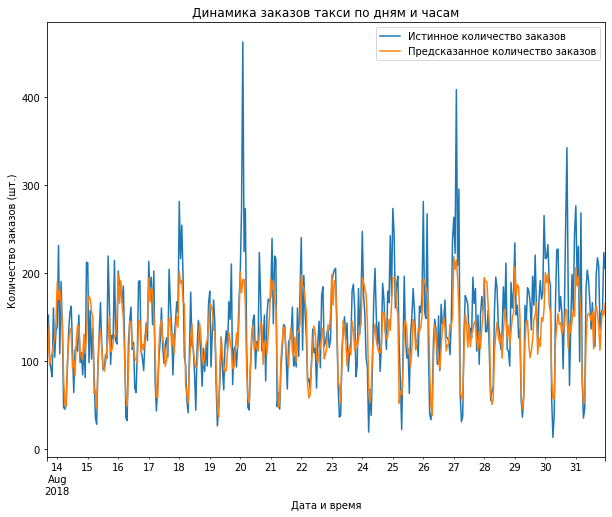

In [42]:
# строим графики по истинным и предсказанным значениям
y_test_full.plot(figsize=(10, 8))
plt.title('Динамика заказов такси по дням и часам')
plt.xlabel('Дата и время')
plt.ylabel('Количество заказов (шт.)')
plt.legend(['Истинное количество заказов',
            'Предсказанное количество заказов']);

**Вывод**

Лучшей моделью для предсказания количества заказов на следующий час является модель `LGBMRegressor` с гиперпараметрами `max_depth`=7, `min_data_in_leaf`=45, `num_leaves`=15. Модель показала значение метрики RMSE на тестовой выборке в размере 40.9, что не превышает требуемого порога 48.0. Визуально предсказания модели также выглядят реалистично в сравнении с истинными значениями целевого признака.

## Общий вывод

В исследовании были проанализированы данные о заказах такси в период с 01 марта 2018 года по 31 августа 2018 года (6 месяцев). Каждое наблюдение содержало данные о суммарном количестве заказов с интервалом в 10 минут. Для анализа и обучения моделей мы выполнили ресемплирование данных с шагом в 1 (один) час.

На этапе анализа была выявлена высокая вариативность данных.

Был обнаружен тренд в динамике заказов такси по дням и часам: количество заказов постепенно увеличивается с начала весны к концу лета. Была также значимо подтверждена стационарность стохастического процесса с помощью теста Дики-Фуллера, что дополнительно подтверждает прогнозируемость имеющегося временного ряда.

По результатам анализа автокорреляции для обучения моделей было решено использовать 1-й, 2-й, 3-й и 24-й лаги: лаги 1-3 непосредственно предшествуют текущему часу, а 24-й лаг даёт представление о тренде в аналогичном часе сутками ранее. Таким образом, мы имеем 4 лага, предшествующих текущему часу, которые определяют тренд для данного временного промежутка.

Также на этапе анализа данных была обнаружена разнонаправленная динамика количества заказов по времени суток (например, ранним утром, около 5-6 часов утра, спрос на такси минимален, а в вечерние и ночные часы максимален) и количества заказов по дням недели (в пятницу и понедельник количество заказов максимально, а во вторник, субботу и воскресенье наблюдается спад).

Динамика заказов по календарным дням и месяцам демонстрирует восходящий тренд.

По результатам анализа данных такие признаки как время суток, календарный день, день недели и месяц были использованы для обучения моделей и выполнения предсказаний целевого признака.

Для обучения моделей первоначальный датасет был разделён на тренировочную и тестовую выборки в соотношении 9 к 1.

В исследовании была решена задача регрессии путём обучения с учителем следующих моделей:

- `LightGBM`;
- `Lasso`;
- `Ridge`;
- `SVR`;
- `kNN`;
- `DecisionTreeRegressor`.

Для каждой из моделей были подобраны гиперпараметры, проверено качество моделей при кросс-валидации и выполнено обучение моделей.

Лучшей из моделей по результатам обучения является модель `LGBMRegressor` с гиперпараметрами `max_depth`=7, `min_data_in_leaf`=45, `num_leaves`=15, показавшая значение метрики RMSE при кросс-валидации в размере 24.0, что не превысило требуемого порога 48.0. Модель показала значение метрики RMSE на тестовой выборке в размере 40.9.

По результатам исследования можно рекомендовать модель `LGBMRegressor` с гиперпараметрами `max_depth`=7, `min_data_in_leaf`=45, `num_leaves`=15 для предсказания количества заказов такси на следующий час.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48